In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_csv("C:/Users/Computer/Downloads/crime_data.csv")

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# Normalize heterogenous numerical data by using Standard Scaler
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])
print(df_norm)


      Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.11445

In [6]:
from sklearn.cluster import KMeans

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


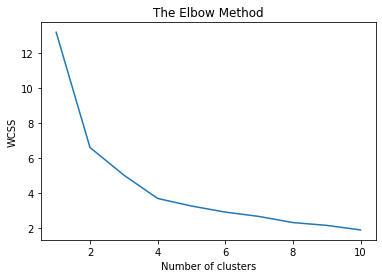

In [7]:
# within-cluster sum-of-squares criterion 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [8]:
#The scree plot levels off at k=4 and let's use it to determine the clusters.

In [9]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_norm)

y_kmeans

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [10]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

In [11]:
# New list called cluster

cluster = list(y_kmeans1)
# Adding cluster to our data set
crime['cluster'] = cluster

In [12]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,3.6,78.5,52.1,12.2
2,11.0,264.0,76.5,33.6
3,13.9,243.6,53.8,21.4
4,5.9,141.2,73.6,19.3


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

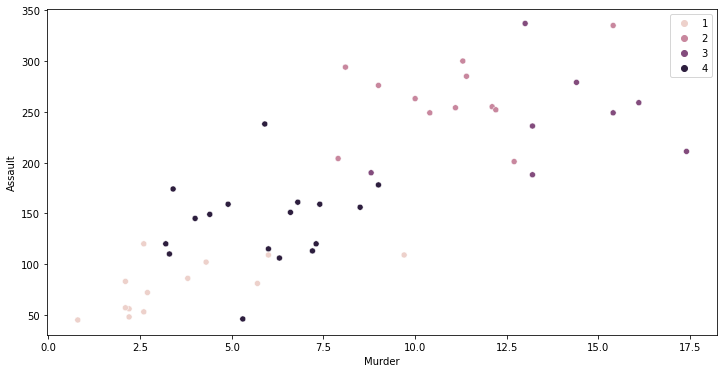

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=y_kmeans1)

In [14]:
#The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults.
#And there is a positive correlation between occurrence of Murder and Assault in different states.

In [16]:
crime[crime['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1
